# Credit Card Fraud Detection using Random Forest

In [1]:
#importing the values of X and y
import pickle

X = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

In [2]:
X.shape

(284807, 29)

In [3]:
y.shape

(284807, 1)

### Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
X_train.shape

(199364, 29)

In [6]:
X_test.shape

(85443, 29)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

In [8]:
y_pred_rf = rf_classifier.predict(X_test)

In [9]:
#Accuracy
rf_classifier.score(X_test, y_test)

0.9995669627705019

In [15]:
#plot the confusion matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [16]:
#confusion matrix
cnf_mat_rf = confusion_matrix(y_test, y_pred_rf)

Confusion matrix, without normalization
[[85290     6]
 [   31   116]]


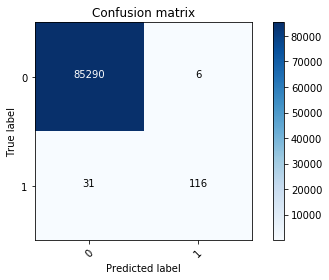

In [17]:
plot_confusion_matrix(cnf_mat_rf, classes=[0,1])

### For full dataset

In [18]:
y_pred_full_rf = rf_classifier.predict(X)
cnf_mat_full_rf = confusion_matrix(y, y_pred_full_rf)

Confusion matrix, without normalization
[[284309      6]
 [    31    461]]


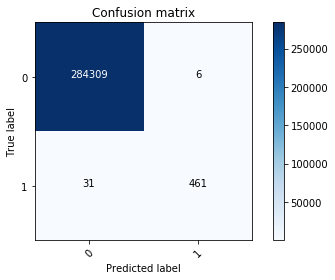

In [19]:
plot_confusion_matrix(cnf_mat_full_rf , classes=[0,1])